In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import cancer_data
import many

import config

config.config_visuals()

In [2]:
merged_tcga_info = pd.read_csv("../data/supplementary/S2_merged-tcga-info.txt", sep="\t",index_col=0)

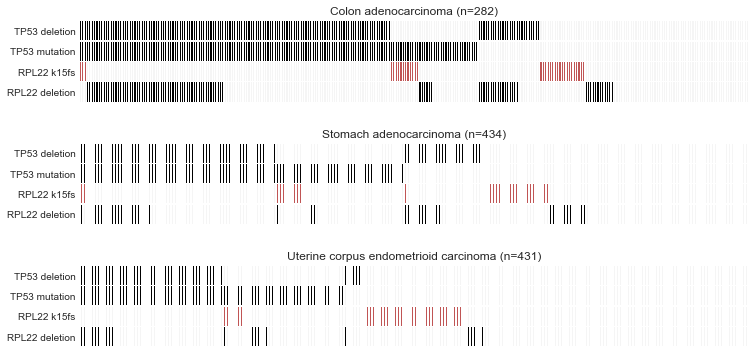

In [220]:
def plot_subset(subset_type=None, ax=None, heatmap_kwargs={}):

    if ax is None:

        plt.figure(figsize=(12, 2))
        ax = plt.subplot(111)

    if subset_type is None:

        subset = merged_tcga_info[
            merged_tcga_info["Sample_type"] == "Primary Tumor"
        ].copy()

    else:

        subset = merged_tcga_info[
            (merged_tcga_info["Primary_disease"] == subset_type)
            & (merged_tcga_info["Sample_type"] == "Primary Tumor")
        ].copy()

    # define TP53 altered
    subset["TP53_mut"] = subset["TP53_mutation_cbioportal"].dropna() != "no alteration"
    subset["TP53_del"] = subset["TP53_copy_number_thresholded"].dropna() <= -1
    subset["RPL22_del"] = subset["RPL22_copy_number_thresholded"].dropna() <= -1
    
    # drop missing annotations
    subset = subset[["TP53_del", "TP53_mut", "RPL22_k15fs_mutation","RPL22_del"]].dropna()

    # sort before plotting
    subset = subset.sort_values(
        ["TP53_mut", "TP53_del", "RPL22_k15fs_mutation","RPL22_del"], ascending=False
    )

    subset["RPL22_k15fs_mutation"] *= 2

    sns.heatmap(
        subset[["TP53_del", "TP53_mut", "RPL22_k15fs_mutation","RPL22_del"]].astype(int).T,
        cbar=False,
        xticklabels=False,
        cmap=sns.color_palette(["whitesmoke", "black", "#c05555"]),
        ax=ax,
        **heatmap_kwargs,
    )

    # set tick labels
    ax.set_yticklabels(["TP53 deletion", "TP53 mutation", "RPL22 k15fs","RPL22 deletion"])
    ax.tick_params(axis="both", which="both", length=0)

    if subset_type:

        ax.set_title(f"{subset_type.capitalize()} (n={len(subset)})")


fig, axes = plt.subplots(3, 1, figsize=(12, 6))

heatmap_kwargs = {"linewidth": 0.25}

plot_subset("colon adenocarcinoma", ax=axes[0], heatmap_kwargs=heatmap_kwargs)
plot_subset("stomach adenocarcinoma", ax=axes[1], heatmap_kwargs=heatmap_kwargs)
plot_subset(
    "uterine corpus endometrioid carcinoma", ax=axes[2], heatmap_kwargs=heatmap_kwargs
)

plt.subplots_adjust(hspace=0.5)

plt.savefig("../plots/TP53-RPL22k15.pdf", bbox_inches="tight")